In [61]:
#analysing the results
DS_NAME = ''
limit = 2

import os
root_path = os.path.abspath('') #current directory
print('Listing the result files list...')
results_file_list = [f for f in os.listdir(root_path) if ((f[-4:] == '.csv') 
                                                          and ((f.upper().find(DS_NAME.upper())>-1) or (DS_NAME==''))
                                                          )]
results_file_list.reverse()
results_file_list

Listing the result files list...


['20211215_031615_VIATURAS_NGEN10_F1.csv',
 '20211214_180157_VIATURAS_NGEN10_ACCURACY.csv',
 '20211214_153002_VIATURAS_NGEN4.csv',
 '20211214_123624_VIATURAS_NGEN5.csv',
 '20211214_074613_VIATURAS_NGEN3.csv',
 '20211207_204541_VIATURAS_NGEN100.csv',
 '20211207_181247_VIATURAS_ENSEMBLE.csv',
 '20211206_211906_VIATURAS_MULTINOMIALNB.csv',
 '20211206_154332.csv']

In [62]:
#loading the dataframe list
import pandas as pd
result_list = [(file_name, pd.read_csv(file_name)) for i, file_name in enumerate(results_file_list) if (limit is None or i<=limit)]
print(len(result_list), 'resuts loaded.')

3 resuts loaded.


In [63]:
import numpy as np
main_metric_list = []
for result in result_list:
    main_metric_list.append(result[1].iloc[0,6])
print('média:', np.mean(main_metric_list))
print('max:', np.max(main_metric_list))

média: 0.8747969468008238
max: 0.9165741768405476


In [64]:
def printResult(i):
    global dfResult
    print(result_list[i][0])
    dfResult = result_list[i][1]
    dfResult = dfResult.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
    
printResult(0)
dfResult

20211215_031615_VIATURAS_NGEN10_F1.csv


,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,"StackingClassifier(estimators=[('e1', Decision...","('4284', '4275', '4274', '4251', '4223', '4218...",180,315.029724,2545.937500,0.821656,0.858942,0.918199,[[212 26]\n [ 30 129]]
1,"StackingClassifier(estimators=[('e1', Decision...","('4284', '4275', '4274', '4255', '4251', '4223...",184,287.443636,2569.128906,0.818182,0.858942,0.908726,[[215 23]\n [ 33 126]]
2,"VotingClassifier(estimators=[('e1', DecisionTr...","('4284', '4275', '4274', '4255', '4251', '4223...",213,60.092387,2260.039062,0.819048,0.856423,0.920419,[[211 27]\n [ 30 129]]
3,"StackingClassifier(estimators=[('e1', Decision...","('4284', '4275', '4255', '4223', '4218', '4196...",188,259.163082,2619.832031,0.812903,0.853904,0.906361,[[213 25]\n [ 33 126]]
4,"StackingClassifier(estimators=[('e1', Decision...","('4284', '4275', '4274', '4255', '4251', '4223...",196,202.701657,2556.949219,0.805195,0.848866,0.918424,[[213 25]\n [ 35 124]]
...,...,...,...,...,...,...,...,...,...
72,KNeighborsClassifier(n_jobs=-1),"('4284', '4274', '4255', '4251', '4223', '4218...",192,23.685096,2354.179688,0.617100,0.740554,0.771788,[[211 27]\n [ 76 83]]
73,"VotingClassifier(estimators=[('e1', DecisionTr...","('4284', '4275', '4274', '4255', '4251', '4223...",183,54.660924,2349.781250,0.629371,0.732997,0.794646,[[201 37]\n [ 69 90]]
74,GaussianNB(),"('4284', '4275', '4274', '4255', '4251', '4223...",213,9.471480,1929.890625,0.532787,0.712846,0.795360,[[218 20]\n [ 94 65]]
75,QuadraticDiscriminantAnalysis(),"('4284', '4275', '4274', '4255', '4251', '4223...",213,10.747330,1968.570312,0.514768,0.710327,0.805652,[[221 17]\n [ 98 61]]


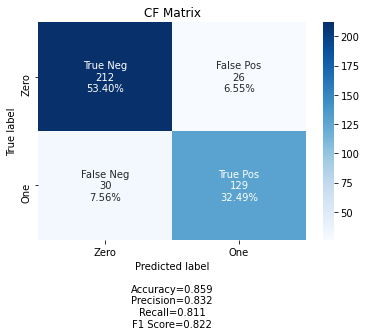

In [65]:
from cf_matrix import make_confusion_matrix_heatmap
import numpy as np
def printCFM():
    m_list = dfResult['confusion_matrix'][0].replace('[','').replace(']','').split('\n')
    matrix = np.asarray([np.fromstring(row, dtype=int, sep=' ') for row in m_list])
    make_confusion_matrix_heatmap(matrix);
printCFM()

In [66]:
printResult(1)
dfResult

20211214_180157_VIATURAS_NGEN10_ACCURACY.csv


,algorithm,features,n_features,train_time,mem_max,accuracy,roc_auc,f1,confusion_matrix
0,"StackingClassifier(estimators=[('e1', RandomFo...","('4298', '4284', '4274', '4267', '4255', '4253...",217,308.056790,2790.785156,0.871537,0.916574,0.827119,[[224 14]\n [ 37 122]]
1,"StackingClassifier(estimators=[('e1', RandomFo...","('4298', '4284', '4274', '4267', '4255', '4253...",220,340.074800,2552.039062,0.869018,0.924793,0.824324,[[223 15]\n [ 37 122]]
2,"StackingClassifier(estimators=[('e1', RandomFo...","('4298', '4284', '4274', '4267', '4255', '4253...",224,375.795301,2358.050781,0.869018,0.921172,0.825503,[[222 16]\n [ 36 123]]
3,"StackingClassifier(estimators=[('e1', RandomFo...","('4298', '4284', '4274', '4267', '4255', '4253...",215,341.416090,2697.875000,0.869018,0.922811,0.825503,[[222 16]\n [ 36 123]]
4,"StackingClassifier(estimators=[('e1', RandomFo...","('4298', '4284', '4274', '4267', '4255', '4253...",208,322.010043,2734.433594,0.869018,0.918794,0.825503,[[222 16]\n [ 36 123]]
...,...,...,...,...,...,...,...,...,...
101,MultinomialNB(),"('4298', '4284', '4274', '4267', '4255', '4253...",224,10.726401,2192.097656,0.738035,0.761878,0.680982,[[182 56]\n [ 48 111]]
102,QuadraticDiscriminantAnalysis(),"('4298', '4284', '4274', '4267', '4255', '4253...",224,12.204186,1986.132812,0.695214,0.818059,0.517928,[[211 27]\n [ 94 65]]
103,GaussianNB(),"('4298', '4284', '4274', '4267', '4255', '4253...",224,9.212221,1943.269531,0.690176,0.792426,0.513834,[[209 29]\n [ 94 65]]
104,QuadraticDiscriminantAnalysis(),"('4298', '4284', '4274', '4255', '4253', '4251...",204,10.276047,2698.691406,0.687657,0.780059,0.495935,[[212 26]\n [ 98 61]]


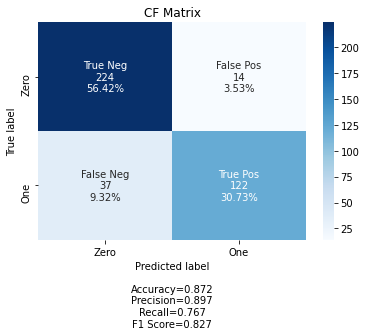

In [67]:
printCFM()

In [68]:
printResult(2)
dfResult

20211214_153002_VIATURAS_NGEN4.csv


,algorithm,features,n_features,train_time,mem_max,roc_auc,f1,accuracy,confusion_matrix
0,"VotingClassifier(estimators=[('e1', RandomFore...","('4275', '4274', '4255', '4253', '4251', '4247...",183,100.752640,2673.277344,0.953570,0.863636,0.894207,[[222 16]\n [ 26 133]]
1,"VotingClassifier(estimators=[('e1', RandomFore...","('4274', '4255', '4253', '4251', '4247', '4223...",180,94.176428,2682.113281,0.952619,0.858065,0.889169,[[220 18]\n [ 26 133]]
2,"StackingClassifier(estimators=[('e1', RandomFo...","('4275', '4274', '4255', '4253', '4223', '4218...",169,695.589180,2602.246094,0.947069,0.857143,0.886650,[[217 21]\n [ 24 135]]
3,"VotingClassifier(estimators=[('e1', RandomFore...","('4275', '4274', '4255', '4253', '4251', '4247...",180,108.023518,2606.433594,0.949818,0.849673,0.884131,[[221 17]\n [ 29 130]]
4,"VotingClassifier(estimators=[('e1', RandomFore...","('4275', '4274', '4255', '4253', '4251', '4247...",195,124.971950,2364.562500,0.953702,0.852564,0.884131,[[218 20]\n [ 26 133]]
5,"VotingClassifier(estimators=[('e1', RandomFore...","('4274', '4255', '4251', '4247', '4223', '4218...",183,115.882148,2603.609375,0.943423,0.852564,0.884131,[[218 20]\n [ 26 133]]
6,"VotingClassifier(estimators=[('e1', RandomFore...","('4275', '4274', '4255', '4253', '4251', '4247...",175,111.037226,2675.500000,0.951641,0.850649,0.884131,[[220 18]\n [ 28 131]]
7,RandomForestClassifier(n_jobs=-1),"('4275', '4274', '4255', '4253', '4251', '4247...",197,118.888302,1970.925781,0.944982,0.850649,0.884131,[[220 18]\n [ 28 131]]
8,"StackingClassifier(estimators=[('e1', RandomFo...","('4275', '4274', '4255', '4253', '4251', '4223...",182,437.815891,2761.882812,0.947783,0.854430,0.884131,[[216 22]\n [ 24 135]]
9,"StackingClassifier(estimators=[('e1', RandomFo...","('4275', '4274', '4255', '4253', '4251', '4223...",176,483.720660,2605.257812,0.948285,0.854430,0.884131,[[216 22]\n [ 24 135]]


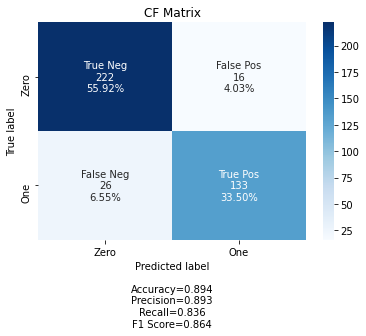

In [69]:
printCFM()